# Libraries

In [1]:
# data analysis
import pandas as pd
import numpy as np
from collections import Counter
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron , SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gs = pd.read_csv('gender_submission.csv')

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

* Survived: 0 = Did not survive, 1 = Survived

* Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

* Sex: Male or female

* Age: Age in years, fractional if less than 1

* SibSp: Number of siblings or spouses aboard the titanic

* Parch: Number of parents or children aboard the titanic

* Ticket: Passenger ticket number

* Fare: Passenger fare

* Cabin: Cabin number

* Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.shape , test_df.shape

((891, 12), (418, 11))

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

In [10]:
# Categorical Variables
describe_categorical(train_df)

Categorical variables are ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 
                                        Name  count  proportion
0                        Abbing, Mr. Anthony      1    0.001122
1                  Nysveen, Mr. Johan Hansen      1    0.001122
2               Nicholson, Mr. Arthur Ernest      1    0.001122
3               Nicola-Yarred, Master. Elias      1    0.001122
4                Nicola-Yarred, Miss. Jamila      1    0.001122
..                                       ...    ...         ...
886               Goodwin, Miss. Lillian Amy      1    0.001122
887              Goodwin, Mr. Charles Edward      1    0.001122
888  Goodwin, Mrs. Frederick (Augusta Tyler)      1    0.001122
889             Graham, Miss. Margaret Edith      1    0.001122
890              van Melkebeke, Mr. Philemon      1    0.001122

[891 rows x 3 columns] 
--------------------------------------------------------------------------------
      Sex  count  proportion
0    male    577    0.6

# EDA

### Sex

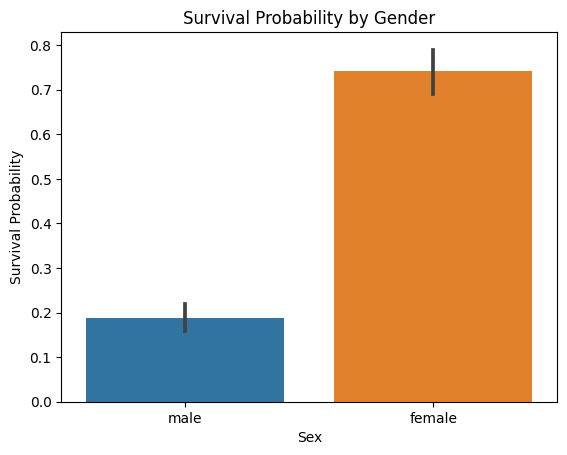

In [11]:
# Let's examine Sex,Cabin and Embarked
sns.barplot(x = 'Sex', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender');

#As we given before analysis Female passengers are more likely to survive

### Pclass

In [12]:
# Passenger Class is a numerical columns as a type but these numbers represent a category.
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


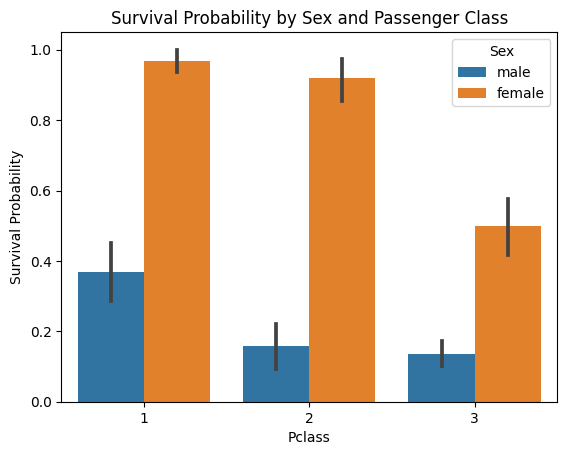

In [14]:
sns.barplot(x = 'Pclass', y ='Survived', data = train_df,hue='Sex')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class');
# as it could seen clearly female passengers survival rate is higher than male passengers
# and Pclass has a affect on passenger survival rate. Probably they started evacuation from first class passengers.

### Embarked

In [15]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_df.Embarked.isna().sum()  # @missing values in this column

2

In [17]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


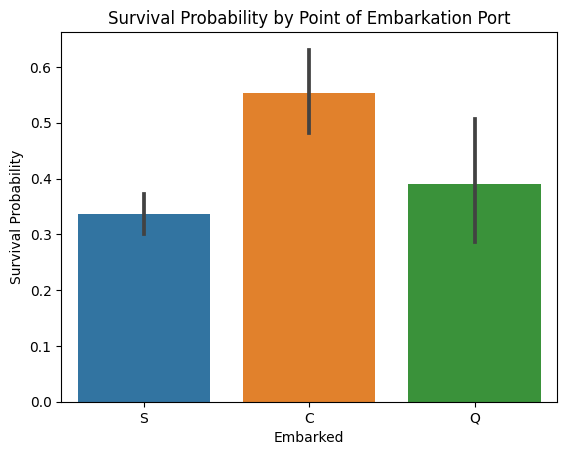

In [18]:
sns.barplot(x = 'Embarked', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation Port');

Survial Rate is the highest for the location C and lowest at the Location S.Is there a pattern related with passengers Embarkation port and survival rate of the passengers? Might be majority of the high class passengers have embarked from location C. The same hypothesis is valid for passengers Embarked from S. The Passengers Embarked from location S could be lower class passengers. Let's check that.

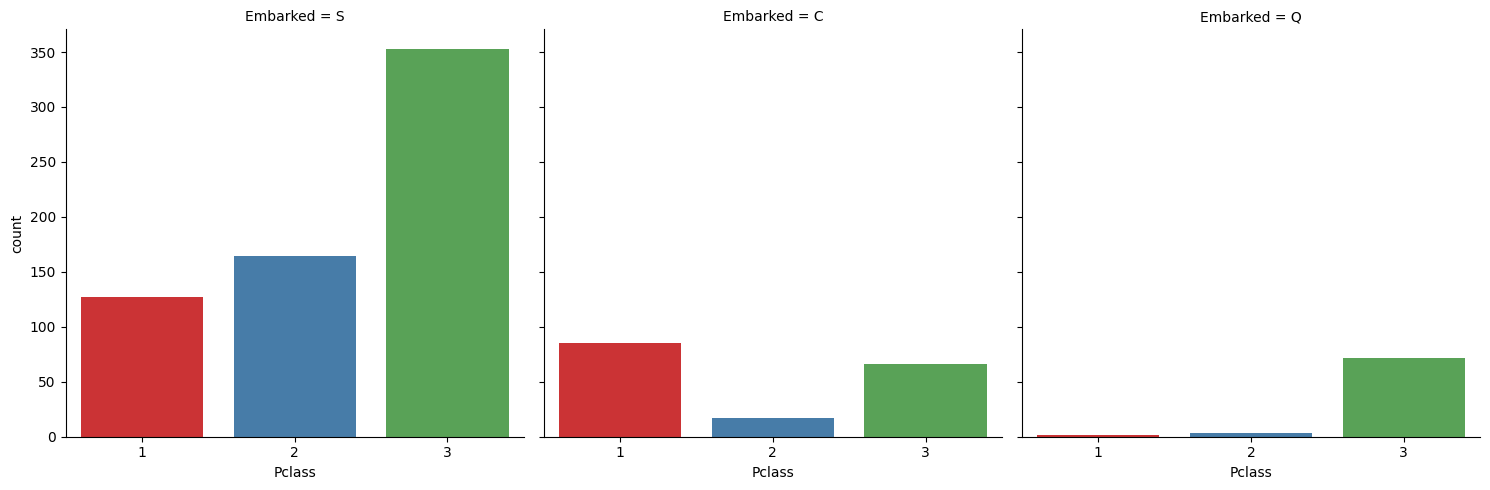

In [19]:
custom_palette = sns.color_palette("Set1")

sns.catplot(x='Pclass', col='Embarked', data=train_df, kind='count', palette=custom_palette);

It seems true.

In [20]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train_df, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [21]:
train_df.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


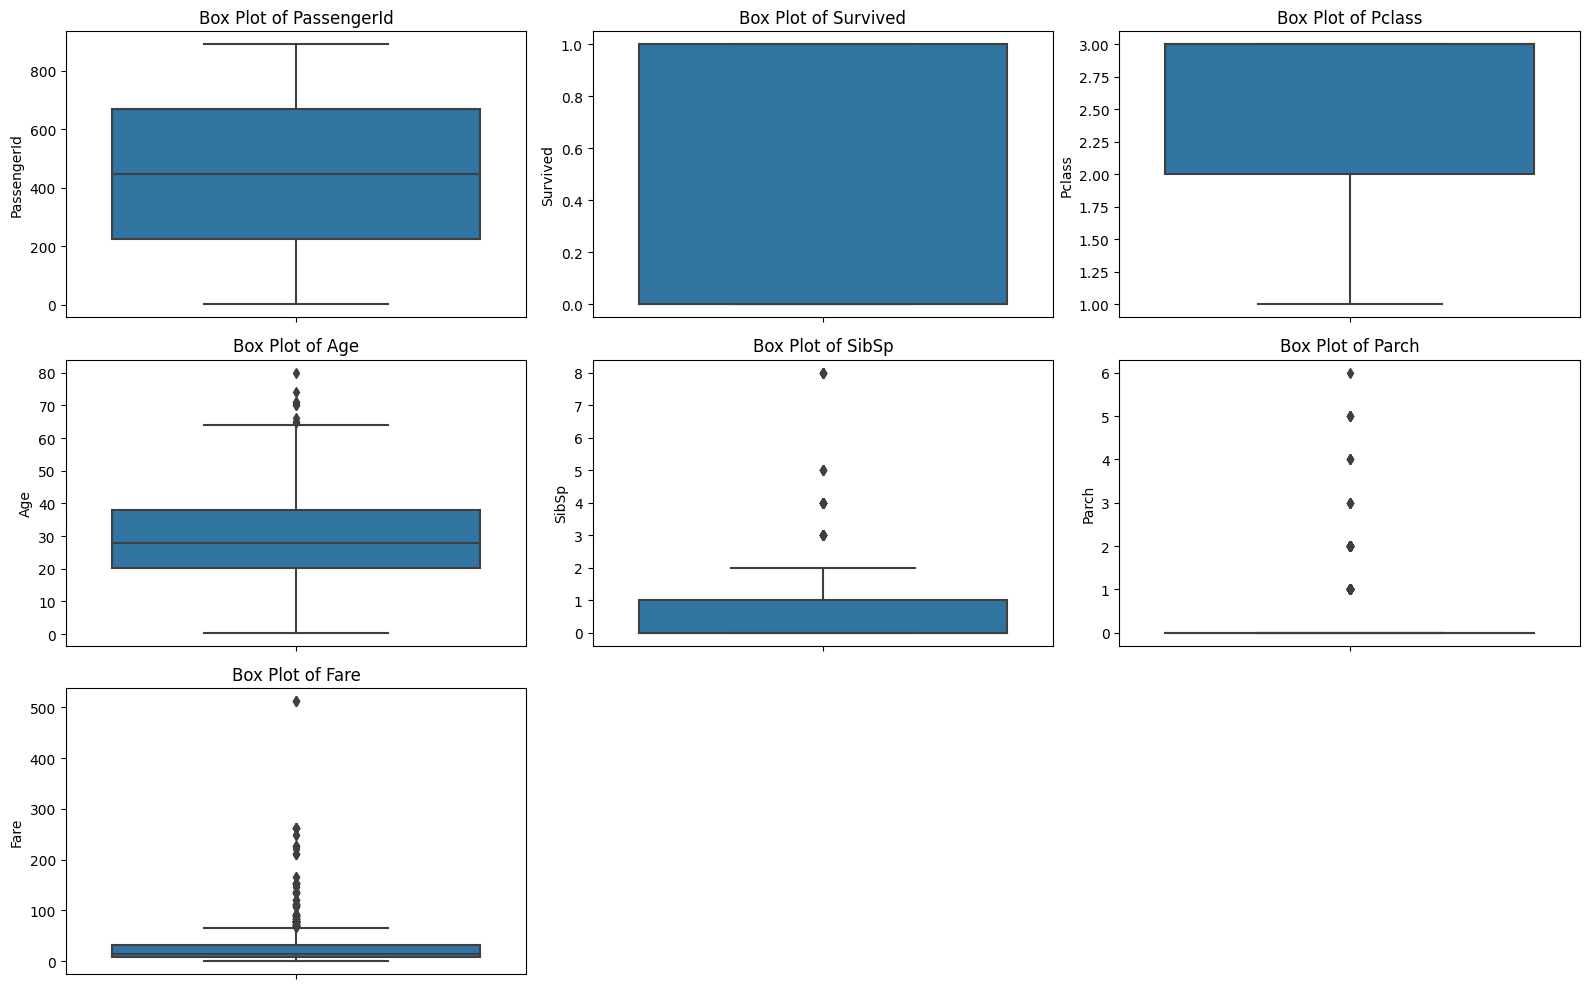

In [22]:
# Select only numeric columns from your DataFrame
numeric_columns = train_df.select_dtypes(include=['number'])
# Create subplots for each numeric column
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)  # 3x3 grid of subplots
    sns.boxplot(data=train_df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [23]:
print("Before: {} rows".format(len(train_df)))
train_df = train_df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train_df)))

Before: 891 rows
After: 881 rows


## Numerical Values

In [24]:
def describe_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.select_dtypes(include=['int']).columns.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.select_dtypes(include=['float']).columns.tolist()
    if len(int_columns) + len(float_columns) != 0:
        print('Numeric variables are', int_columns + float_columns, '\n' + '==' * 40)
        # integer numeric feature
        if len(int_columns) != 0:
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count'] / len(dataset)
                print(describe_frame, '\n' + '--' * 40)  # display value count and proportion of a categorical feature
        #
        print(dataset[int_columns + float_columns].describe().loc[['min', 'max', 'mean', '50%']].T.rename(
            columns={'50%': 'median'}), '\n' + '--' * 40)
    else:
        print('There are no numeric variables in the dataset')



In [25]:
describe_numeric(train_df)

Numeric variables are ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare'] 
     PassengerId  count  proportion
0              1      1    0.001135
1            600      1    0.001135
2            589      1    0.001135
3            590      1    0.001135
4            591      1    0.001135
..           ...    ...         ...
876          303      1    0.001135
877          304      1    0.001135
878          305      1    0.001135
879          306      1    0.001135
880          891      1    0.001135

[881 rows x 3 columns] 
--------------------------------------------------------------------------------
   Survived  count  proportion
0         0    541    0.614075
1         1    340    0.385925 
--------------------------------------------------------------------------------
   Pclass  count  proportion
0       3    484    0.549376
1       1    213    0.241771
2       2    184    0.208854 
----------------------------------------------------------------------------

# Correlation with survival

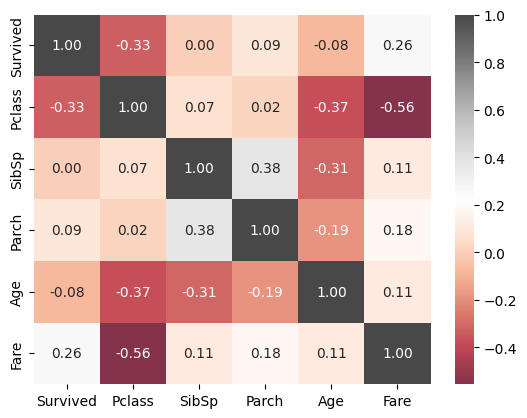

In [26]:
sns.heatmap(train_df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare']].corr(),annot=True,fmt='.2f',cmap='RdGy',
            alpha=0.8);

# Data Preprocessing


In [27]:
def duplicate_and_missing(dataset, dataset_name):  
    print('There are', dataset.shape[0], 'rows and', dataset.shape[1], 'columns in the dataset', '"'+dataset_name+'"','\n'+'--'*40)
    # display missing values
    if dataset.isna().sum().sum()!=0:  # if there is missing values
        missing_value = dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_value['proportion'] = missing_value['count']/len(dataset)
        print('There are', dataset.isna().sum().sum(), 'missing values')
        print(missing_value, '\n'+'--'*40)
    else:
        print('There is no missing value')
    # display duplicate rows
    if dataset.duplicated().sum()!=0:
        print('There are', dataset.duplicated().sum(), 'duplicate rows\n')
    else:
        print('There is no duplicate row\n')

In [28]:
duplicate_and_missing(train_df,'Training Data')

# We could drop Cabin because there are so many missing values!

There are 881 rows and 12 columns in the dataset "Training Data" 
--------------------------------------------------------------------------------
There are 852 missing values
          count  proportion
Age         170    0.192963
Cabin       680    0.771850
Embarked      2    0.002270 
--------------------------------------------------------------------------------
There is no duplicate row



In [29]:
duplicate_and_missing(test_df, 'Test Data')

# We could drop Cabin because there are so many missing values!

There are 418 rows and 11 columns in the dataset "Test Data" 
--------------------------------------------------------------------------------
There are 414 missing values
       count  proportion
Age       86    0.205742
Fare       1    0.002392
Cabin    327    0.782297 
--------------------------------------------------------------------------------
There is no duplicate row



In [30]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

# Gender survival percentage

,Sex,Survived
0,female,0.747573
1,male,0.190559


In [31]:
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

In [32]:
describe_categorical(train_df)

Categorical variables are ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 
                                        Name  count  proportion
0                        Abbing, Mr. Anthony      1    0.001135
1                        Novel, Mr. Mansouer      1    0.001135
2                 Newell, Mr. Arthur Webster      1    0.001135
3               Newsom, Miss. Helen Monypeny      1    0.001135
4               Nicholls, Mr. Joseph Charles      1    0.001135
..                                       ...    ...         ...
876               Goodwin, Miss. Lillian Amy      1    0.001135
877              Goodwin, Mr. Charles Edward      1    0.001135
878  Goodwin, Mrs. Frederick (Augusta Tyler)      1    0.001135
879             Graham, Miss. Margaret Edith      1    0.001135
880              van Melkebeke, Mr. Philemon      1    0.001135

[881 rows x 3 columns] 
--------------------------------------------------------------------------------
      Sex  count  proportion
0    male    572    0.6

In [33]:
train_df.isna().sum()*100/len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.296254
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.185017
Embarked        0.227015
dtype: float64

In [34]:
train_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [35]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [36]:
mode = train_df.Embarked.dropna().mode()[0]

In [37]:
mode


'S'

In [38]:
train_df.Embarked.fillna(mode,inplace=True)

In [39]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [40]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [41]:
test_df.Fare.dropna().median()

14.4542

In [42]:
test_df.Fare.fillna(test_df.Fare.dropna().median(),inplace=True)

In [43]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [44]:
df = pd.concat([train_df,test_df], axis=0).reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [45]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [46]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])  # 1 Male 0 Female

In [47]:
df.Sex.value_counts()

1    838
0    461
Name: Sex, dtype: int64

In [48]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

 Fill the misisng Age Values

In [49]:
age_nan_indices = list(df[df['Age'].isnull()].index)
len(age_nan_indices)

256

In [50]:
for index in age_nan_indices:
    median_age = df['Age'].median()
    predict_age = df['Age'][(df['SibSp'] == df.iloc[index]['SibSp']) 
                                 & (df['Parch'] == df.iloc[index]['Parch'])
                                 & (df['Pclass'] == df.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        df['Age'].iloc[index] = median_age
    else:
        df['Age'].iloc[index] = predict_age
        
        
# why we checked the value of Parch PClass SibSp ? 
# Because they have a correlation !

In [51]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

# Data Transformation


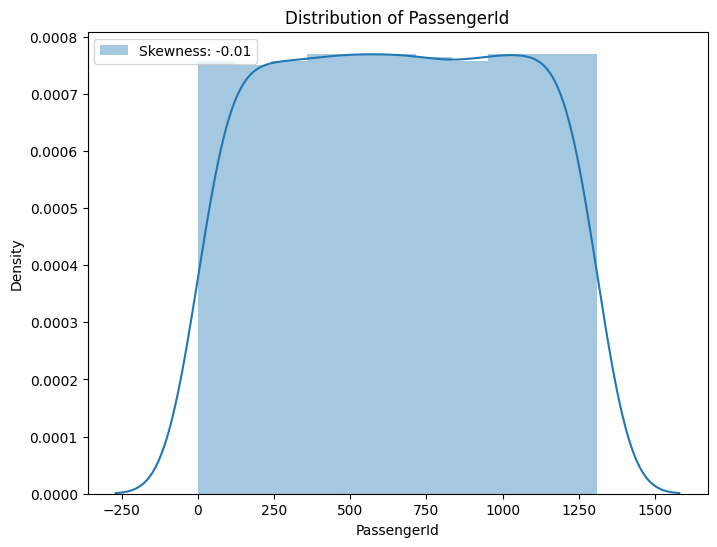

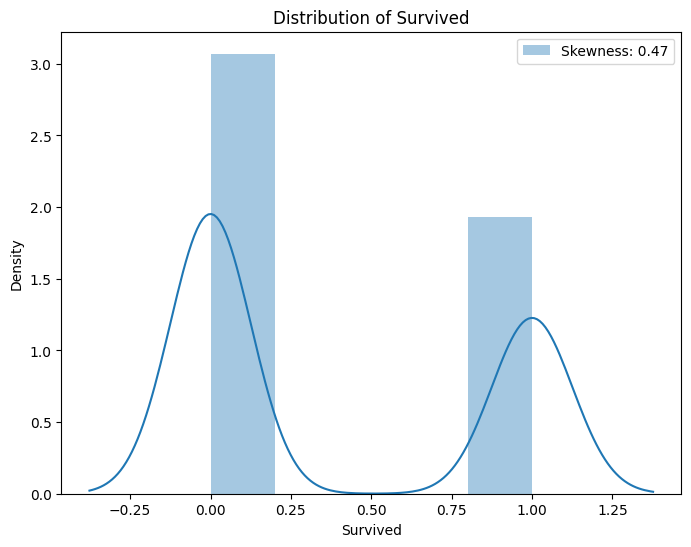

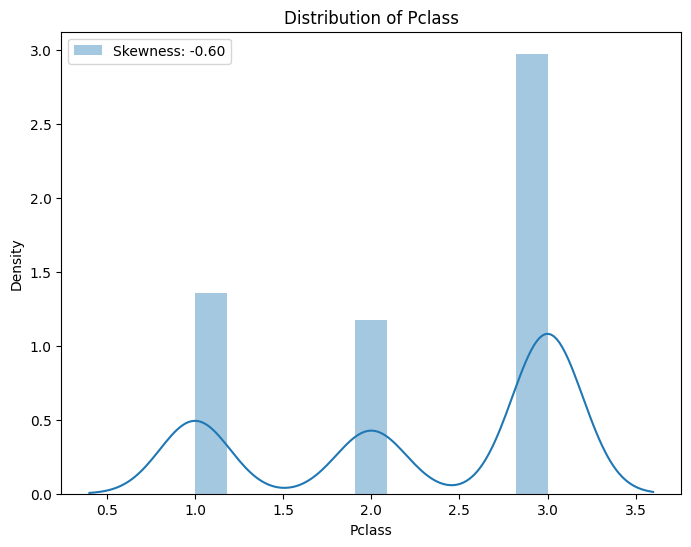

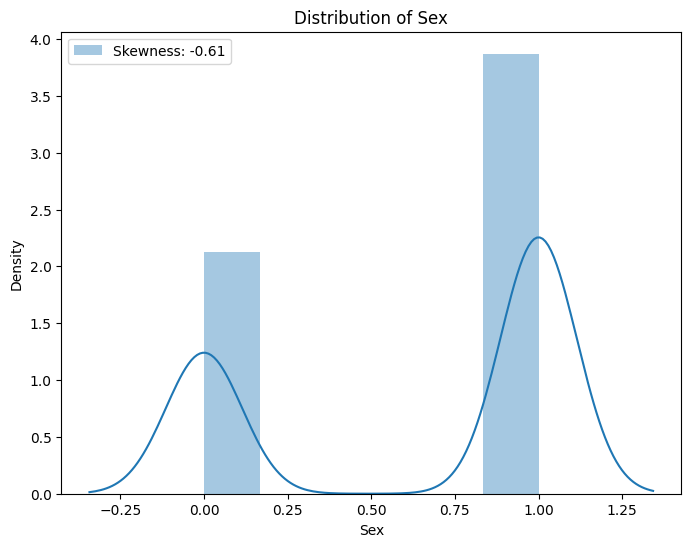

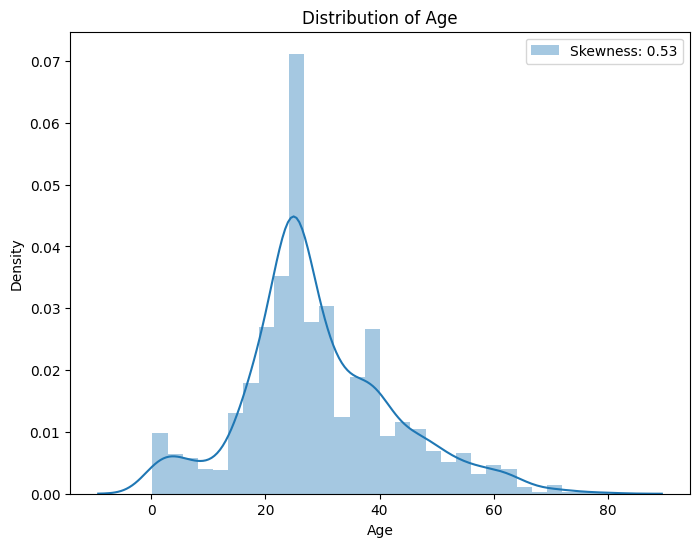

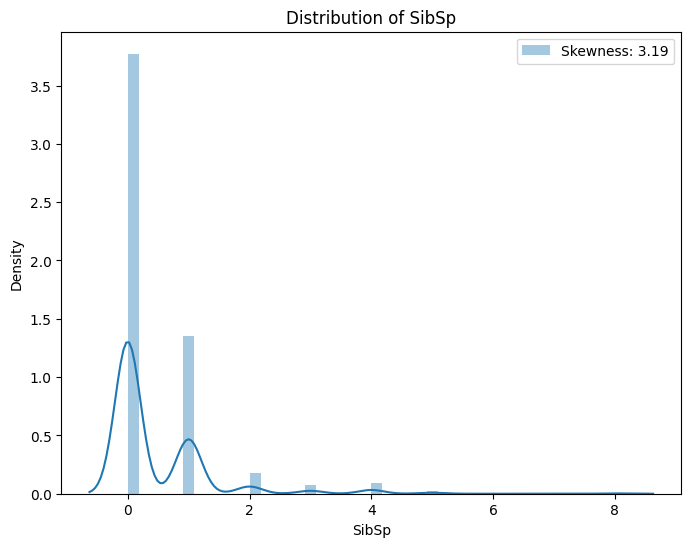

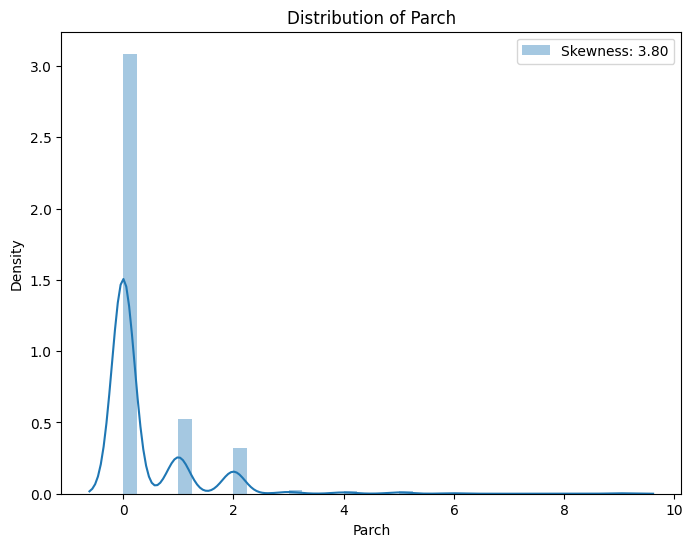

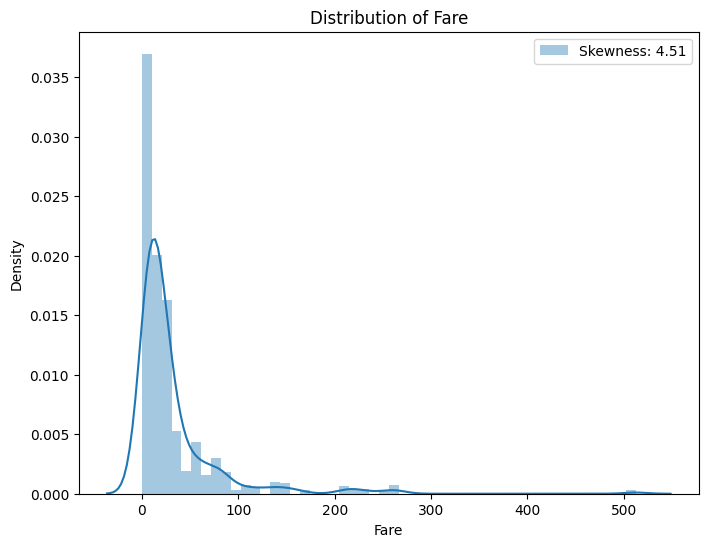

In [52]:
for column in df.columns:
    if df[column].dtype != 'object':  # Check if the column is numeric
        plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
        sns.distplot(df[column], label=f'Skewness: %.2f' % (df[column].skew()))
        plt.legend(loc='best')
        plt.title(f'Distribution of {column}')
        plt.show()

In [53]:
# Apply log transformation to a column with high skewness
df['Fare'] = np.log1p(df['Fare'])


In [54]:
df.Fare.skew()

0.5440041447582978

# Feature Engineering

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,2.202765,S


In [56]:
df['Title'] = [name.split(',')[1].split('.')[0].strip() for name in df['Name']]
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [57]:
df.Title.value_counts()  # Let's bin them

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [58]:
# Define a dictionary to map titles to their simplified categories
title_mapping = {
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Lady': 'Rare',
    'Jonkheer': 'Rare',
    'Don': 'Rare',
    'Capt': 'Rare',
    'the Countess': 'Rare',
    'Sir': 'Rare',
    'Dona': 'Rare',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
}

# Apply the mapping to simplify the 'Title' column
df['Title'] = df['Title'].replace(title_mapping)

In [59]:
df.Title.value_counts()

Mr        753
Miss      259
Mrs       198
Master     60
Rare       29
Name: Title, dtype: int64

In [60]:
df.head() # name columns seems unnecessary for ML model


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2.110213,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,4.280593,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2.188856,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3.990834,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,2.202765,S,Mr


In [61]:
df.drop('Name',axis=1,inplace=True)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,1,22.0,1,0,2.110213,S,Mr
1,2,1.0,1,0,38.0,1,0,4.280593,C,Mrs
2,3,1.0,3,0,26.0,0,0,2.188856,S,Miss
3,4,1.0,1,0,35.0,1,0,3.990834,S,Mrs
4,5,0.0,3,1,35.0,0,0,2.202765,S,Mr


### Is_alone

In [63]:
df['Familysize'] = df['SibSp'] + df['Parch']
df[['Familysize','Parch','SibSp']].head()

,Familysize,Parch,SibSp
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [64]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,1,0.0,3,1,22.0,1,0,2.110213,S,Mr,1
1,2,1.0,1,0,38.0,1,0,4.280593,C,Mrs,1
2,3,1.0,3,0,26.0,0,0,2.188856,S,Miss,0
3,4,1.0,1,0,35.0,1,0,3.990834,S,Mrs,1
4,5,0.0,3,1,35.0,0,0,2.202765,S,Mr,0


In [65]:
df[['Familysize', 'Survived']].groupby('Familysize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

# Familysize survival percentage

,Familysize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.052632
7,7,0.000000
8,10,NaN


In [66]:
df['Is_alone'] = 1
df.loc[df['Familysize'] == 1 , 'Is_alone']=0  # 0 means not alone 1 means alone

In [67]:
df[['Is_alone', 'Survived']].groupby('Is_alone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Is_alone,Survived
0,0,0.552795
1,1,0.348611


In [68]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Is_alone
0,1,0.0,3,1,22.0,1,0,2.110213,S,Mr,1,0
1,2,1.0,1,0,38.0,1,0,4.280593,C,Mrs,1,0
2,3,1.0,3,0,26.0,0,0,2.188856,S,Miss,0,1
3,4,1.0,1,0,35.0,1,0,3.990834,S,Mrs,1,0
4,5,0.0,3,1,35.0,0,0,2.202765,S,Mr,0,1


# Age binning

In [69]:
df['AgeBin'] = pd.cut(df['Age'] , 5)

In [70]:
df[['AgeBin', 'Survived']].groupby('AgeBin', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,AgeBin,Survived
0,"(0.0902, 16.136]",0.532110
3,"(48.068, 64.034]",0.434783
2,"(32.102, 48.068]",0.412844
1,"(16.136, 32.102]",0.339662
4,"(64.034, 80.0]",0.090909


In [71]:
df.loc[df['Age'] <= 16.136, 'Age'] = 0
df.loc[(df['Age'] > 16.136) & (df['Age'] <= 32.102), 'Age'] = 1
df.loc[(df['Age'] > 32.102) & (df['Age'] <= 48.068), 'Age'] = 2
df.loc[(df['Age'] > 48.068) & (df['Age'] <= 64.034), 'Age'] = 3
df.loc[df['Age'] > 64.034 , 'Age'] = 4

In [72]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Is_alone,AgeBin
0,1,0.0,3,1,1.0,1,0,2.110213,S,Mr,1,0,"(16.136, 32.102]"
1,2,1.0,1,0,2.0,1,0,4.280593,C,Mrs,1,0,"(32.102, 48.068]"
2,3,1.0,3,0,1.0,0,0,2.188856,S,Miss,0,1,"(16.136, 32.102]"
3,4,1.0,1,0,2.0,1,0,3.990834,S,Mrs,1,0,"(32.102, 48.068]"
4,5,0.0,3,1,2.0,0,0,2.202765,S,Mr,0,1,"(32.102, 48.068]"


In [73]:
df.drop('AgeBin',axis=1,inplace=True)

In [74]:
df['Age'].dtypes

dtype('float64')

In [75]:
df['Age'] = df['Age'].astype('int')

In [76]:
df['Age'].dtypes

dtype('int32')

In [77]:
#Age & Class Feature
df['Age_Class'] = df['Age'] * df['Pclass']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Is_alone,Age_Class
0,1,0.0,3,1,1,1,0,2.110213,S,Mr,1,0,3
1,2,1.0,1,0,2,1,0,4.280593,C,Mrs,1,0,2
2,3,1.0,3,0,1,0,0,2.188856,S,Miss,0,1,3
3,4,1.0,1,0,2,1,0,3.990834,S,Mrs,1,0,2
4,5,0.0,3,1,2,0,0,2.202765,S,Mr,0,1,6


# Fare Binning

In [78]:
df['Farebin'] = pd.cut(df['Fare'],4)
df[['Farebin', 'Survived']].groupby('Farebin', as_index = False).mean().sort_values(by = 'Survived', ascending = True)


,Farebin,Survived
0,"(-0.00624, 1.56]",0.066667
1,"(1.56, 3.12]",0.285164
2,"(3.12, 4.681]",0.518395
3,"(4.681, 6.241]",0.750000


In [79]:
df.loc[df['Fare'] <= 1.56, 'Fare'] = 0
df.loc[(df['Fare'] > 1.56) & (df['Fare'] <= 3.12), 'Fare'] = 1
df.loc[(df['Fare'] > 3.12) & (df['Fare'] <= 4.681), 'Fare'] = 2
df.loc[(df['Fare'] > 4.681) , 'Fare'] = 3


In [80]:
df['Fare'].dtypes# convert it to int

dtype('float64')

In [81]:
df['Fare'] = df['Fare'].astype('int')

In [82]:
df['Fare'].dtypes #perfect!

dtype('int32')

In [83]:
df.drop('Farebin',axis=1,inplace=True)

In [84]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Is_alone,Age_Class
0,1,0.0,3,1,1,1,0,1,S,Mr,1,0,3
1,2,1.0,1,0,2,1,0,2,C,Mrs,1,0,2
2,3,1.0,3,0,1,0,0,1,S,Miss,0,1,3
3,4,1.0,1,0,2,1,0,2,S,Mrs,1,0,2
4,5,0.0,3,1,2,0,0,1,S,Mr,0,1,6


In [85]:
df = pd.get_dummies(df, columns = ['Title'])
df = pd.get_dummies(df, columns = ['Embarked'], prefix = 'Em')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize,Is_alone,Age_Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,1,1,1,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,0,2,1,0,2,1,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,0,1,0,0,1,0,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,0,2,1,0,2,1,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,1,2,0,0,1,0,1,6,0,0,1,0,0,0,0,1


# Train - Test - Split 
We split the data which does not have survived information 

In [86]:
train = df[:len(train_df)]
test = df[len(train_df):]

In [87]:
train.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Familysize      0
Is_alone        0
Age_Class       0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
Em_C            0
Em_Q            0
Em_S            0
dtype: int64

In [88]:
test.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Familysize        0
Is_alone          0
Age_Class         0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rare        0
Em_C              0
Em_Q              0
Em_S              0
dtype: int64

In [89]:
train['Survived'] = train['Survived'].astype('int')

In [90]:
test.drop('Survived',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace = True)

In [91]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 17)
Y_train shape:  (881,)
X_test shape:  (418, 17)


# Modelling

# Logistic Regression

In [94]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train,Y_train)*100,2)
acc_log

83.31

# Support Vector Machines

In [95]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.09

# K-nearest neighbours (KNN)

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

81.04

# Gaussian naive bayes

In [97]:
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

80.59

# Perceptron

In [99]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

81.61

# Linear SVC

In [100]:
linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linearsvc = round(linear_svc.score(X_train,Y_train)*100,2)
acc_linearsvc

82.75

# Stochastic gradient descent

In [101]:
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

76.84

# Decision tree

In [103]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_train,Y_train)*100,2)
acc_dt

87.51

# Random forest

In [104]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train,Y_train)*100,2)
acc_rf

87.51

In [108]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train,Y_train)*100,2)
acc_xgb


87.4

In [110]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'XGBClassifier'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_rf, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linearsvc, acc_dt, acc_xgb]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)


,Model,Score
0,Random Forest,87.51
1,Decision Tree,87.51
2,XGBClassifier,87.40
3,Logistic Regression,83.31
4,Support Vector Machines,83.09
5,Linear SVC,82.75
6,Perceptron,81.61
7,KNN,81.04
8,Naive Bayes,80.59
9,Stochastic Gradient Decent,76.84


# Models

In [111]:
models = []
models.append(LogisticRegression())
models.append(SVC())
models.append(KNeighborsClassifier(n_neighbors = 5))
models.append(GaussianNB())
models.append(Perceptron())
models.append(LinearSVC())
models.append(SGDClassifier())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(XGBClassifier())

In [112]:
len(models)

10

In [113]:
cv_results = []
for model in models:
    cv_results.append(cross_val_score(model, X_train, Y_train, scoring = 'accuracy', cv = 10))

In [116]:
cv_results

[array([0.83146067, 0.84090909, 0.76136364, 0.875     , 0.79545455,
        0.76136364, 0.79545455, 0.79545455, 0.86363636, 0.86363636]),
 array([0.84269663, 0.86363636, 0.73863636, 0.88636364, 0.82954545,
        0.79545455, 0.80681818, 0.78409091, 0.86363636, 0.85227273]),
 array([0.7752809 , 0.79545455, 0.76136364, 0.75      , 0.81818182,
        0.78409091, 0.79545455, 0.77272727, 0.79545455, 0.82954545]),
 array([0.76404494, 0.82954545, 0.73863636, 0.84090909, 0.79545455,
        0.80681818, 0.77272727, 0.73863636, 0.85227273, 0.80681818]),
 array([0.75280899, 0.80681818, 0.73863636, 0.875     , 0.76136364,
        0.77272727, 0.79545455, 0.65909091, 0.71590909, 0.82954545]),
 array([0.85393258, 0.84090909, 0.75      , 0.875     , 0.80681818,
        0.78409091, 0.80681818, 0.76136364, 0.88636364, 0.86363636]),
 array([0.75280899, 0.57954545, 0.72727273, 0.85227273, 0.77272727,
        0.78409091, 0.78409091, 0.72727273, 0.84090909, 0.82954545]),
 array([0.7752809 , 0.81818182, 0.

In [117]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [118]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.826315,0.042599,Support Vector Machines
1,0.822893,0.045622,Linear SVC
2,0.818373,0.040074,Logistic Regression
3,0.802528,0.039246,CatBoost
4,0.794586,0.038298,Gausian Naive Bayes
5,0.794561,0.019864,Random Forest
6,0.787755,0.023167,KNN
7,0.779801,0.027876,Decision Tree
8,0.770735,0.057582,Perceptron
9,0.765054,0.074647,Stochastic Gradient Descent


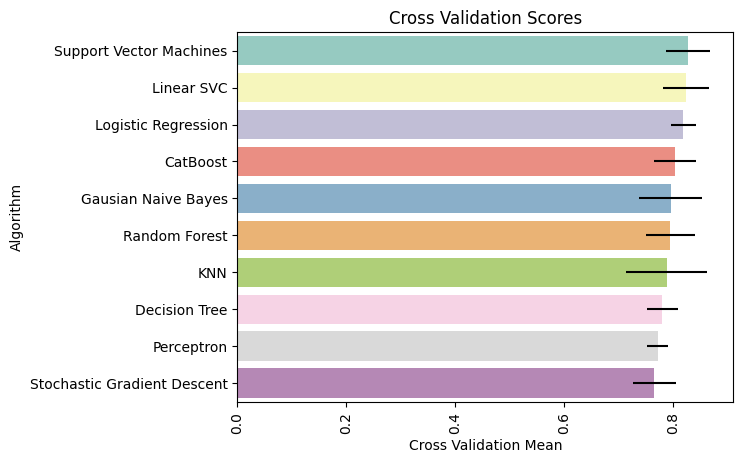

In [122]:
cv_res_sorted = cv_res.sort_values(by='Cross Validation Mean', ascending=False)
sns.barplot(x='Cross Validation Mean', y='Algorithm', data=cv_res_sorted,
            order=cv_res_sorted['Algorithm'], palette='Set3', xerr=cv_std)
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')
plt.xticks(rotation=90)
plt.show()



In [123]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.723 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.767 total time=   0.1s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [124]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=10, gamma=0.01)


In [125]:
# Training accuracy

svc = SVC(C = 10, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [126]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758937

In [127]:
# Survival predictions by support vector classifier

Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [128]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [129]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,1
883,894,0
884,895,0
885,896,1


# Best Score is SVC : 0.8297242083758937